In [1]:
# 导入必要的包
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

## 数据预处理

In [2]:
# 读取数据
df = pd.read_csv('qPCR_data.csv')

# 将类别变量（label）转化为数值变量，正例（肝癌病人）为1，负例（健康人）为0
df['label'] = df['label'].map({'HCC': 1, 'NC': 0})

# 查看是否有缺失值
print(df.count())

# 删除id列，便于后续处理
df = df.drop(['sample_id'], axis=1)

# 用中位数填充缺失值
df = df.fillna(df.median())

# 将数据按label分为两组
df_hcc = df[df['label'] == 1]  # 肝癌病人组
df_nc = df[df['label'] == 0]  # 健康人组

# 查看数据
df.head()

sample_id           52
SNORD3B             52
HULC                51
LINC01226           52
hsa_circ_0073052    49
hsa_circ_0080695    44
miR-21              51
miR-26a             51
miR-27a             52
miR-122             52
miR-192             52
miR-223             52
label               52
dtype: int64


,SNORD3B,HULC,LINC01226,hsa_circ_0073052,hsa_circ_0080695,miR-21,miR-26a,miR-27a,miR-122,miR-192,miR-223,label
0,3.072431,-1.554841,1.131273,-0.066437,-6.124729,8.133185,-0.624419,0.237637,9.456500,-0.158377,-5.195042,1
1,-1.559677,-2.728607,-0.959708,0.666755,-7.979978,0.805463,0.138164,1.198761,3.474772,-1.359291,-6.533736,1
2,-2.077954,-8.188078,-6.783983,2.059199,-6.681655,-1.105434,-2.046128,-1.087293,0.544543,-3.750608,-9.531275,1
3,7.648093,2.122047,5.224223,1.938615,-4.897092,-1.374800,-1.308909,-2.635333,1.437953,-5.036686,-8.267998,1
4,2.819371,-4.583385,-3.332853,-0.514964,-8.407561,-1.697270,-1.083671,-1.049840,0.884081,-4.349654,-8.383437,1


## 探索性数据分析（EDA）

### 箱型图

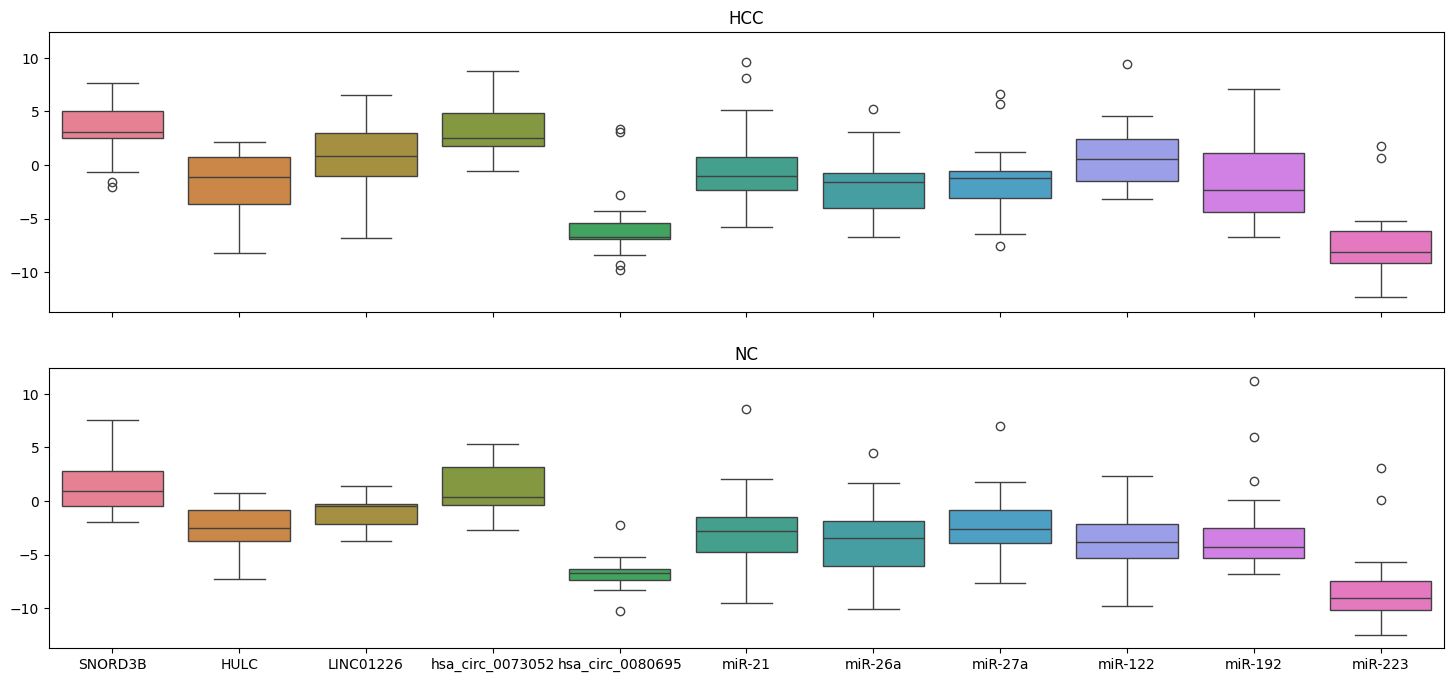

In [4]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 8), sharex=True, sharey=True)

sns.boxplot(df_hcc.iloc[:, :-1], ax=ax1)
ax1.set_title('HCC')

sns.boxplot(df_nc.iloc[:, :-1], ax=ax2)
ax2.set_title('NC')

plt.show()

### 小提琴图

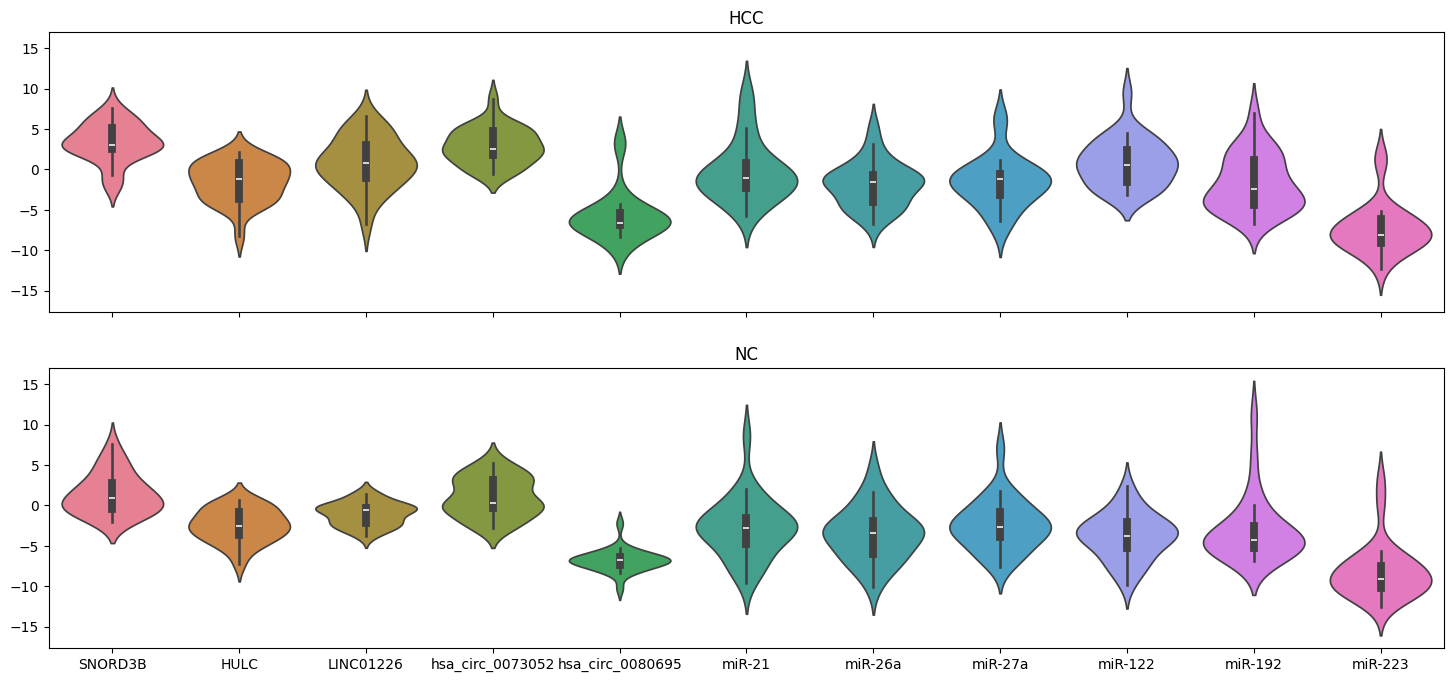

In [5]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(18, 8), sharex=True, sharey=True)

sns.violinplot(df_hcc.iloc[:, :-1], ax=ax1)
ax1.set_title('HCC')

sns.violinplot(df_nc.iloc[:, :-1], ax=ax2)
ax2.set_title('NC')

plt.show()

### 相关系数热图

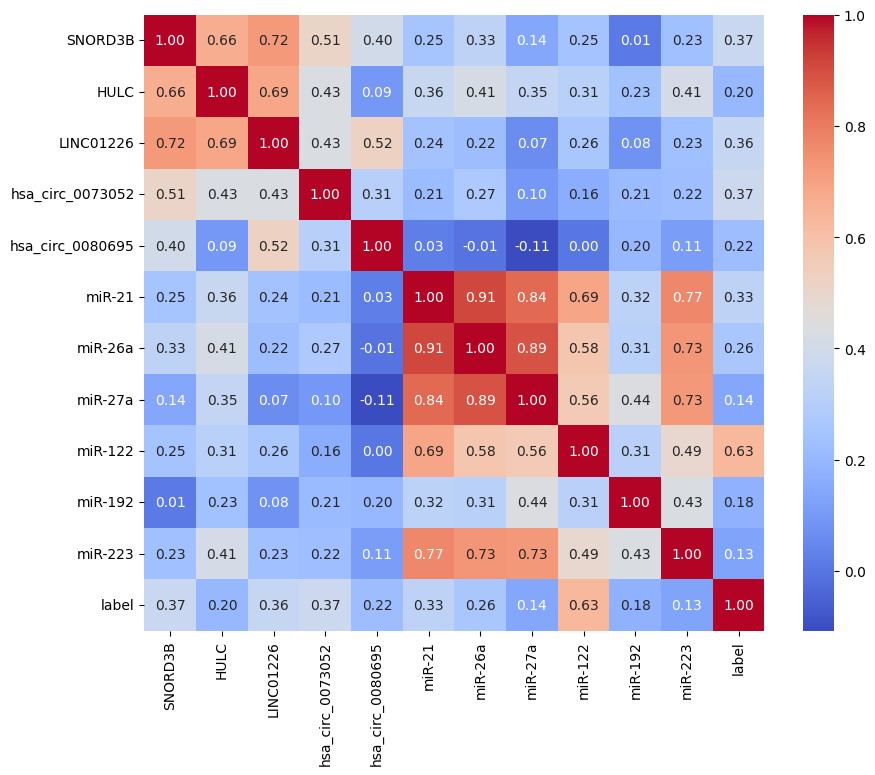

In [6]:
# 计算相关系数矩阵
df_corr = df.corr()

# 绘制热图
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr, cmap='coolwarm',
            annot=True, fmt=".2f", annot_kws={"size": 10})

plt.show()

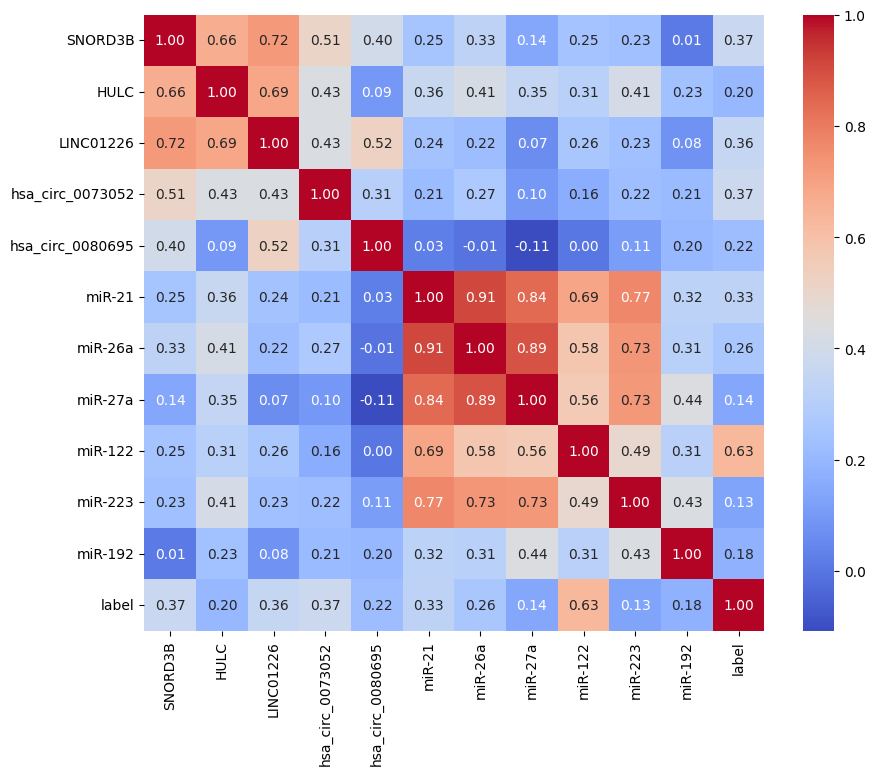

In [9]:
# 交换倒数第3列与倒数第2列的顺序
cols = df.columns.tolist()
cols[-3], cols[-2] = cols[-2], cols[-3]
df_exchange = df[cols]

# 计算相关系数矩阵
df_exchange_corr = df_exchange.corr()

# 绘制热图
plt.figure(figsize=(10, 8))
sns.heatmap(df_exchange_corr, cmap='coolwarm',
            annot=True, fmt=".2f", annot_kws={"size": 10})

plt.show()

### Q-Q plot

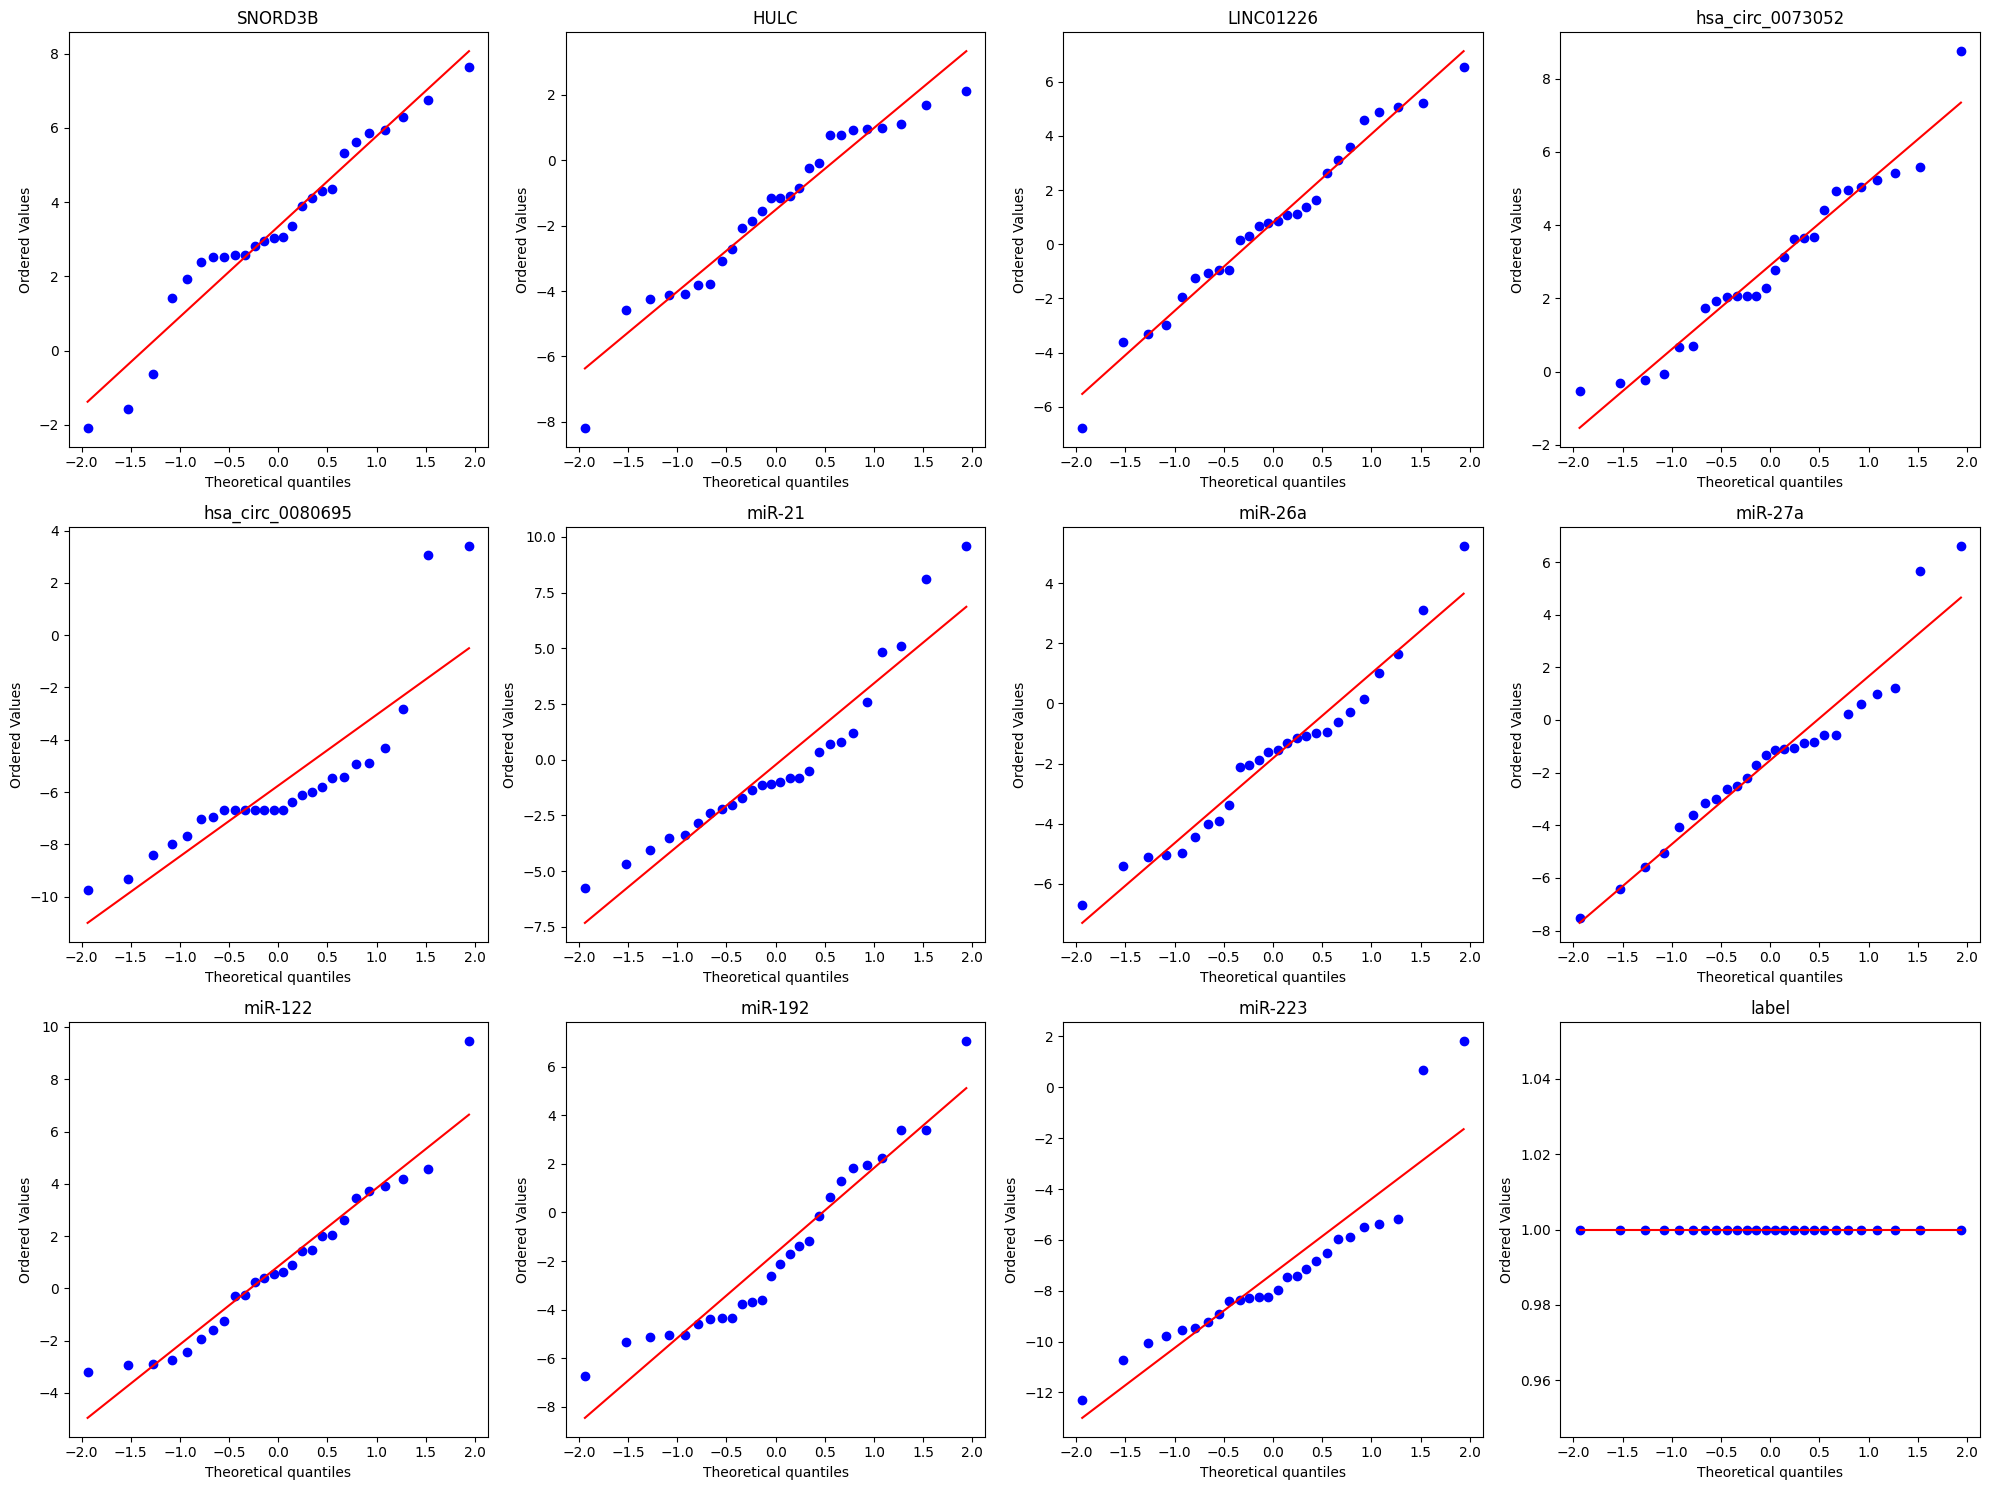

In [10]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# 创建一个 3x4 的子图布局
fig, axs = plt.subplots(3, 4, figsize=(20, 15))

# 填充子图内容（每张子图画一列数据的 Q-Q 图）
for i in range(3):
    for j in range(4):
        data = df_hcc.iloc[:, i*4+j]
        stats.probplot(data, dist="norm", plot=axs[i, j])
        axs[i, j].set_title(df.columns[i*4+j])  # 设置标题为列名称

# 调整子图之间的间距
plt.tight_layout()

# 显示图形
plt.show()

## PCA

### 确定主成分个数

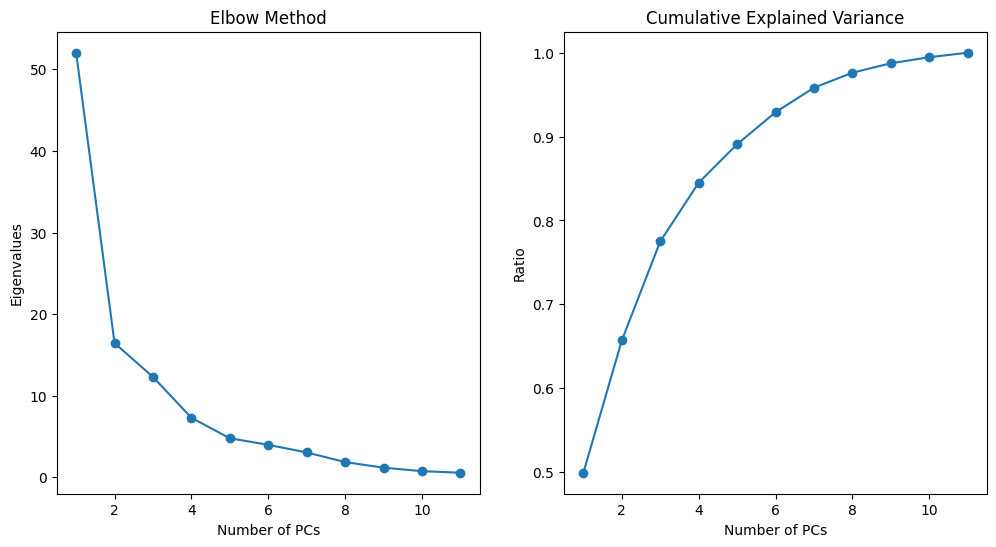

Cumulative Explained Variance: [0.499 0.657 0.775 0.845 0.891 0.929 0.958 0.976 0.987 0.995 1.   ]


In [18]:
from sklearn.decomposition import PCA

X = df.drop(['label'], axis=1)
y = df['label']
pca = PCA().fit(X)

# 绘制肘形图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.plot(range(1, pca.n_components_ + 1), pca.explained_variance_, marker='o')
ax1.set_xlabel('Number of PCs')
ax1.set_ylabel('Eigenvalues')
ax1.set_title('Elbow Method')

# 绘制方差累积图
ax2.plot(range(1, pca.n_components_ + 1),
         pca.explained_variance_ratio_.cumsum(), marker='o')
ax2.set_xlabel('Number of PCs')
ax2.set_ylabel('Ratio')
ax2.set_title('Cumulative Explained Variance')

plt.show()

# 累积方差解释比例
print('Cumulative Explained Variance:',
      pca.explained_variance_ratio_.cumsum().round(3))

### 主成分系数

In [17]:
pca_final = PCA(6).fit(X)
pca_final.components_

array([[ 0.13980245,  0.16824219,  0.12968548,  0.11460967,  0.03628736,
         0.50196741,  0.39597055,  0.38247188,  0.38757049,  0.27305436,
         0.37558103],
       [ 0.51944303,  0.32211327,  0.53125061,  0.35960819,  0.35103391,
        -0.13525056, -0.07757579, -0.23430328, -0.04370416, -0.08606671,
        -0.0559074 ],
       [-0.12564238, -0.01272501, -0.03872691,  0.097154  ,  0.21063789,
        -0.22667116, -0.18067784, -0.04500382, -0.14010047,  0.90631393,
         0.04077203],
       [-0.03697419, -0.08264826,  0.07031254, -0.10382155, -0.01874958,
        -0.07500184, -0.24868524, -0.2149465 ,  0.86944191,  0.08178396,
        -0.31533853],
       [-0.13856878, -0.47563733,  0.07942498, -0.2334317 ,  0.75033638,
         0.19891188, -0.03755619, -0.12067455,  0.00538613, -0.14522051,
         0.23261061],
       [-0.07377891, -0.35426042, -0.32104301,  0.81952044,  0.06213583,
         0.12183338,  0.14766161, -0.08735604,  0.05241139, -0.05853505,
        -0.200

### PCA可视化

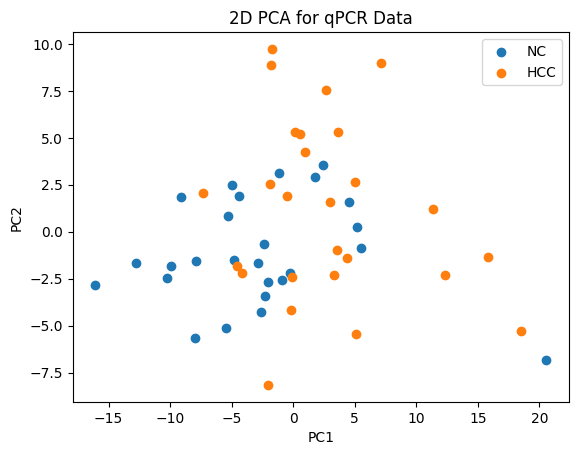

In [16]:
pca_2d = PCA(2).fit_transform(X)  # 取主成分个数为2以可视化

y = df['label']
names = ['NC', 'HCC']

for i in range(2):
    plt.scatter(pca_2d[y == i, 0], pca_2d[y == i, 1],
                label=names[i])

plt.title('2D PCA for qPCR Data')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()

plt.show()

## Kernel SVM

In [14]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, auc, roc_curve

### 构建模型并训练

In [19]:
# 划分训练集与测试集
X_PCA = PCA(6).fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_PCA, y, test_size=0.2, random_state=666)


# 创建Kernel SVM模型

ksvm = SVC(kernel='rbf', class_weight='balanced')  # 使用高斯核


# 训练模型

ksvm.fit(X_train, y_train)


# 在测试集上预测

y_pred = ksvm.predict(X_test)


# 计算准确率

accuracy = accuracy_score(y_test, y_pred)


print("Accuracy:", accuracy)

Accuracy: 0.9090909090909091


### ROC曲线

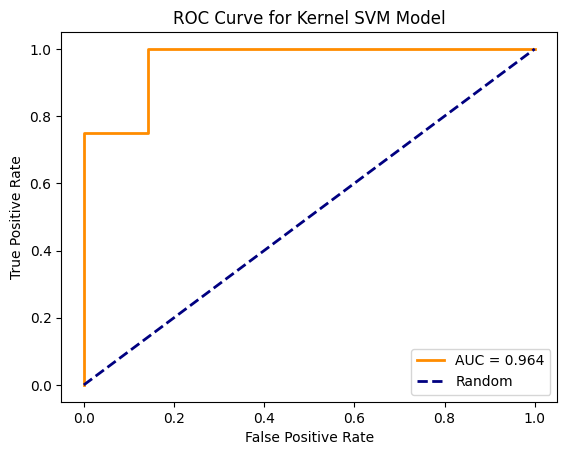

In [20]:
# 计算预测概率
y_score = ksvm.decision_function(X_test)

# 计算 ROC 曲线
fpr, tpr, _ = roc_curve(y_test, y_score)
AUC = auc(fpr, tpr).round(3)

# 画出 ROC 曲线
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"AUC = {AUC}")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Kernel SVM Model')
plt.legend()

plt.show()